# [La marche du cavalier](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_cavalier)

## Objet du problème

Un cavalier au jeu d'échecs est posé sur un échiqier de $n=p\times q$ cases ($p=q=8$ par exemple). Il faut le déplacer $n$ fois de manière qu'il parcoure une et une seule fois chacune des $n$ cases de l'échiquier puis qu'il revienne à sa position initiale. 

## Généralisation

Un chemin $s_0,\ldots,s_{n-1}$ d'un graphe $G=(S,A)$ est dit *hamiltonien* si les $s_i$ sont distincts et $S=\{s_0,\ldots,s_{n-1}\}$. Si, de plus, $(s_{n-1},s_0)\in A$, on dit que $s_0,\ldots,s_{n-1},s_n$ est un *cycle hamiltonien*.

### Recherche des chemins hamiltoniens et des cycles hamiltoniens d'un graphe

In [3]:
class HAMILTONIEN:

    def __init__(self,g):
        """g est un dictionnnaire definissant un graphe par liste d'adjacence
        """
        self.g = g
        self.taille = len(g)
        for i in self.g:  
            self.g[i].sort(key = lambda j: len(self.g[j]))      

    def cheminHamiltonien(self, initial, final = None):
    
        c = [initial]
        l = 1
        parcourus = {i : False for i in self.g}
        parcourus[initial] = True
        def parcours():
            nonlocal c,l,parcourus
            if l == self.taille and (final is None or c[-1] == final):
                yield c
            else:
                for i in self.g[c[-1]]:
                    if not parcourus[i]:
                        c.append(i)
                        l += 1
                        parcourus[i] = True
                        for p in parcours():
                            yield p
                        c.pop()
                        l -= 1
                        parcourus[i] = False
        return parcours()
                        
    def cycleHamiltonien(self, initial):
    
        for c in self.cheminHamiltonien(initial):
            if c[0] in self.g[c[-1]]: yield c + [c[0]]
        

## Application à la marche du cavalier 

On cherche les cycles hamiltoniens du graphe dont le sommets sont les cases de l'échiqier, deux cases étant reliées par un arc si le cavalier peut passer de l'une à l'autre (en un coup).

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'

class CAVALIER:

    def __init__(self, p = 8, q = 8):
    
        self.p, self.q = p, q
        self.g = dict()
        for i in range(p): 
            for j in range(q):
                self.g[(i,j)] = [(k, l) for k in range(i-2,i+3) for l in range(j-2,j+3)
                                 if  (i - k)**2 + (j - l)**2 == 5 and 0 <= k < p and 0 <= l < q]
    def hamiltonien(self):
        return HAMILTONIEN(self.g)

      
    def plotSolution(self, sol):
    
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        kwargs = {'color' : 'lightgrey', 'linewidth' : 1.}
        for i in [0,self.p]:
            ax.plot([i-.5, i-.5],[-.5, self.q - .5],**kwargs)
        for j in [0,self.q]:
            ax.plot([-.5, self.p - .5],[j - .5, j - .5],**kwargs)
        for i in range(self.p):
            for j in range(self.q):
                if not (i + j) %  2:
                    ax.add_patch(plt.Rectangle((i - .5, j - .5), 1 , 1, fill = True, fc = 'lightgrey'))
        ax.plot(*zip(*sol),'go-')

### Tests 

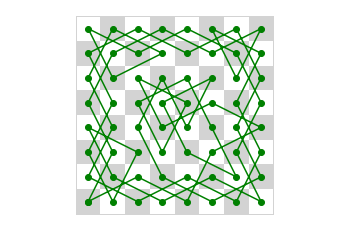

In [5]:
c = CAVALIER()
s = c.hamiltonien().cycleHamiltonien((0,0))
sol = next(s)
c.plotSolution(sol)

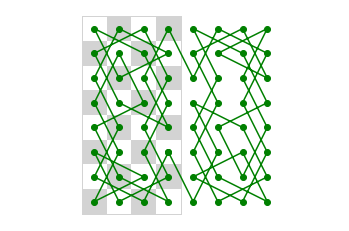

In [6]:
cG = CAVALIER(p = 4)
sG = cG.hamiltonien().cheminHamiltonien(initial = (3,2), final = (3,7))
solG = next(sG)
rot = lambda c: (7 - c[0], 7 - c[1]) # symétrie / au centre de l'échiquier
solD = list(map(rot, solG))
cG.plotSolution(solG + solD + [(3,2)])

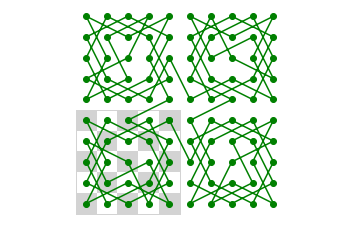

In [7]:
cGB = CAVALIER(p = 5, q = 5)
sGB = cGB.hamiltonien().cheminHamiltonien(initial = (4,4), final = (2,4))
solGB = next(sGB)
rot = lambda c: (c[1], 9 - c[0]) # rotation(centre du damier, pi/2)
solGH = list(map(rot, solGB))
solDH = list(map(rot, solGH))
solDB = list(map(rot, solDH))
cGB.plotSolution(solGB + solGH + solDH + solDB + [(4,4)])